# Data preparation

We combine the data, convert the labels for classification and apply augmentation

In [1]:
import os, sys, math, json
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time
import pandas as pd
from sklearn.model_selection import train_test_split

import tensorflow as tf
print("Tensorflow version " + tf.__version__)
AUTOTUNE = tf.data.AUTOTUNE

np.random.seed(0)

IMAGE_SIZE = [32, 32]

Tensorflow version 2.5.0


In [2]:
df = pd.read_json('../data/labelled_data/prepared-samples-binary.json')

y = df['label'].to_numpy()
X = np.array(df['data'].to_list())
X = np.expand_dims(X, axis=3)
print(y.shape)
print(X.shape)

(200,)
(200, 32, 32, 1)


In [3]:
# Create train / val / test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [4]:
# Simple MLN Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(32, 32)))
model.add(tf.keras.layers.Dense(256, activation='elu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(32, activation='elu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(
optimizer='adam',
loss= 'binary_crossentropy',
metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                8224      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 270,657
Trainable params: 270,657
Non-trainable params: 0
__________________________________________________

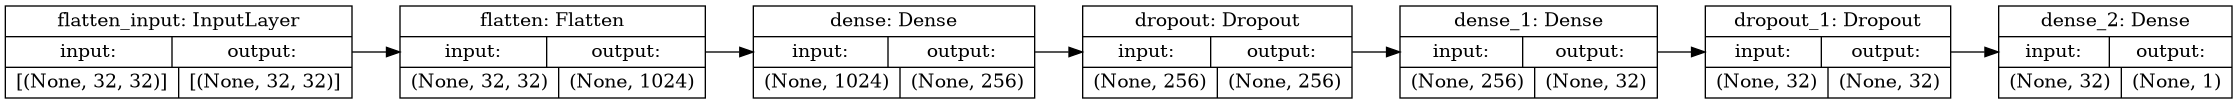

In [5]:
# Plot the model
# `rankdir='LR'` is to make the graph horizontal.
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

Epoch 1/50
8/8 [==============================] - 1s 28ms/step - loss: 10.5445 - accuracy: 0.5750 - val_loss: 2.5317 - val_accuracy: 0.3500
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 4.2804 - accuracy: 0.5833 - val_loss: 2.6787 - val_accuracy: 0.3500
Epoch 3/50
8/8 [==============================] - 0s 8ms/step - loss: 3.4075 - accuracy: 0.6583 - val_loss: 2.3505 - val_accuracy: 0.6500
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 2.9085 - accuracy: 0.4500 - val_loss: 1.1630 - val_accuracy: 0.3500
Epoch 5/50
8/8 [==============================] - 0s 8ms/step - loss: 1.5498 - accuracy: 0.4917 - val_loss: 1.2523 - val_accuracy: 0.3500
Epoch 6/50
8/8 [==============================] - 0s 6ms/step - loss: 1.4348 - accuracy: 0.4833 - val_loss: 1.0745 - val_accuracy: 0.3500
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 1.2286 - accuracy: 0.4667 - val_loss: 0.8916 - val_accuracy: 0.3500
Epoch 8/50
8/8 [================

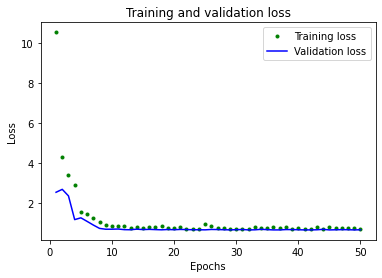

Test loss: 0.6733537912368774 / Test accuracy: 0.6000000238418579


In [6]:
# Fit the model
EPOCHS = 50
BATCH_SIZE = 16
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

# Plot training history
plt.plot(epochs, train_loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("simpleCnn-eval.png")
plt.show()

# Generate generalization metrics
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

In [7]:
n=4 # pics per row

label = {1: 'Human',
         0: 'No Human'}

pred = model.predict(X_test)

def get_class(x):
    if x>=0.5:
        return 1
    return 0

get_classv = np.vectorize(get_class)

classes = get_classv(pred.squeeze())

print(pred) 
print(f'{y_test} {sum(y_test)} / {y_test.shape[0]}')
print(classes)

[[0.40931624]
 [0.4050913 ]
 [0.41272342]
 [0.407948  ]
 [0.41186672]
 [0.40560728]
 [0.40922877]
 [0.41173747]
 [0.40928155]
 [0.4116497 ]
 [0.4091908 ]
 [0.4122839 ]
 [0.41329455]
 [0.4132722 ]
 [0.40908498]
 [0.40765262]
 [0.41236836]
 [0.40884605]
 [0.4105342 ]
 [0.4084879 ]
 [0.41051015]
 [0.41286469]
 [0.40895507]
 [0.41135696]
 [0.41123122]
 [0.41075242]
 [0.4037806 ]
 [0.4104642 ]
 [0.4109278 ]
 [0.40737846]
 [0.40869942]
 [0.4132512 ]
 [0.4116098 ]
 [0.41314778]
 [0.40716618]
 [0.41226435]
 [0.40733472]
 [0.41303363]
 [0.40821064]
 [0.41138127]]
[1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1
 0 0 0] 16 / 40
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


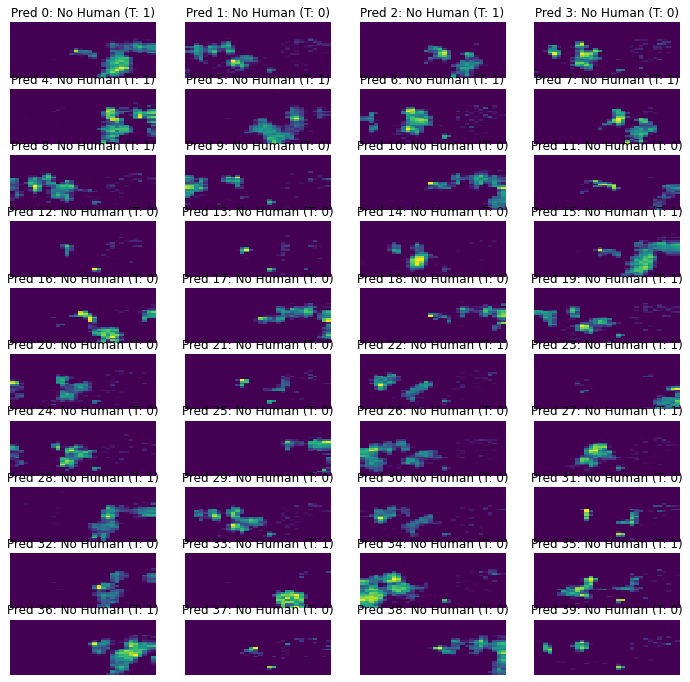

In [8]:
# Print predictions
fig, axes = plt.subplots(nrows=int(len(X_test)/n), ncols=n, figsize=(n*3, n*3), num='Predictions')
for ax, idx in zip(axes.reshape(-1), range(len(X_test))): 
    ax.set_axis_off()
    ax.set_title('Pred %i: %s (T: %i)' % (idx, label[classes[idx]], y_test[idx]))
    ax.imshow(X_test[idx].reshape(32, 32), interpolation='nearest', aspect='auto')

In [9]:
# Export saved model
tf.keras.models.save_model(model, "simpleMln-binary.h5")